# Lab 10: Model Selection/Regularization

ER190 | Fall 2018

Duncan Callaway

GSI: Seigi Karasaki

**Your Name:**

**Collaborators:**

### Introduction

#### *"Essentially, all models are wrong, but some are useful."*

-George Box, Statistician


Model selection is central to statistical analysis and allows us to make inferences about data that we do not know about. In this lab, we will work with some familiar data we used in HW6 and utilize various techniques in order to explore other methods of model selection. 

Learning objectives:
1. Learn how to run Ridge and minimize bias-variance tradeoff by tuning regularization weight by cross validation
2. Do the same for lasso
3. Be able to explain, in terms of the bias-variance tradeoff, why models with different regularization weights have different prediction errors
4. Understand that ridge does not drive parameters all the way to zero, but Lasso will
5. Understand the importance of standardizing predictors before running ridge or lasso
5a. See equation 6.6 in ISLR
5b. have students see the difference in selected variables and coefficient estimates between model runs with and without predictor standardization.

In [ ]:
# Run this block.

import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_context("talk")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. EDA and Regularization

Californians are burdened by environmental problems and sources of pollution in ways that vary across the state. Some Californians are more vulnerable to the effects of pollution than others. [CalEnviroScreen](https://oehha.ca.gov/media/downloads/calenviroscreen/report/ces3report.pdf) uses a science-based method for evaluating multiple pollution
sources in a community while accounting for a community’s vulnerability to pollution’s adverse effects. 

In this lab, we will be working with the latest California Communities Environmental Health Screening data. We want to see how different environmental indicators will help us identify trends in cardiovascular disease. In order to accomplish this, we must first get to know our data and create models of the data.

In [ ]:
#run to load the dataset we'll be working with
data = pd.read_csv('data/ces3results.csv')

In [ ]:
#Peek at the first few rows of the data
data.head()

#### Question 1.1

Let's familiarize ourselves with the data. Group the data by cities to find out the amount of times each city was surveyed.
Also notice that each indiciator has an accompanying Percentile. Percentiles are used to assign scores for each of the indicators in a given geographic area. The percentile represents a relative score for the indicators.

In [ ]:
#your code here

How many features does the data contain? (Hint: consider the dimensions of the dataframe)

**Your answer here**

#### Question 1.2

Let's clean up the data by creating a dataframe containing the features that will allow us to best model cardiovascular disease incidences. Create a dataframe containing columns with: `City`, `Ozone Pctl`, `PM2.5 Pctl`, `Diesel PM Pctl`, `Pesticides Pctl`, `Traffic Pctl`, `Pollution Burden Pctl`, and `Cardiovascular Disease Pctl`

In [ ]:
#your code here

#### Question 1.3

Identify the potential target variables and list them below. Reminder: the target variable will allow us to estimate cardiovascular disease percentiles.

**Your answer here**

### Regularization

Feature engineering can incorporate important information about the data generation process into our model. However, adding features to the data also typically increases the variance of our model and can thus result in worse performance overall. Rather than throwing out features entirely, we can turn to a technique called regularization to reduce the variance of our model while still incorporating as much information about the data as possible.

More generally, we can adopt the framework of regularized loss minimization.

$$ \large \hat{\theta} = \arg \min_\theta \frac{1}{n} \sum_{i=1}^n \textbf{Loss}\left(y_i, f_\theta(x_i)\right) + \lambda \textbf{R}(\theta) $$


The regularization term $\textbf{R}(\theta)$ penalizes for $\theta$ values that result in more complex and therefore higher variance models. The regularization parameter $\lambda$ determines the degree of regularization to apply and is typically determined through cross validation. Observe the inverse relationship between Bias and Variance below:
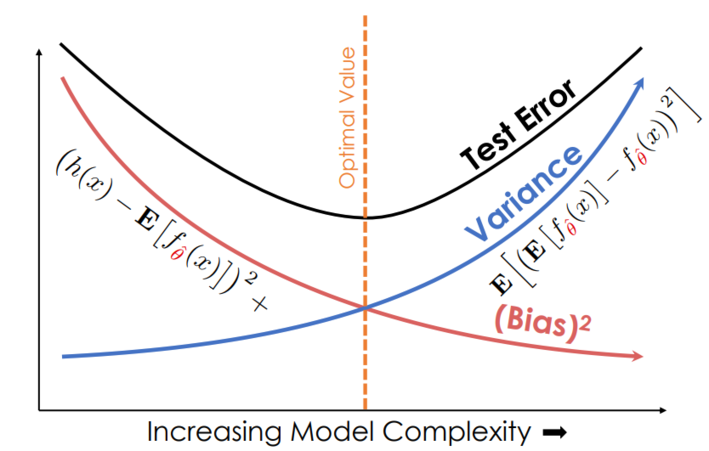


#### Question 1.4

Using [Seaborn](https://seaborn.pydata.org/) plotting methods, create a plot of the first 40 cities in our data for `Ozone Pctl`vs`Cardiovascular Disease Pctl` and create a best fit line that will show us the correlation between these two variables.

In [ ]:
#your code here

#### Question 1.5
It is extremely crucial that we standardize our predictors before running ridge or lasso. Why is this the case? 

**Your answer here**

# 2. L2 Regularization: Ridge Regression

$L_2$ regularization is a method of penalizing large weights in a cost function in order to lower model variance.

Consider a general linear model $\hat{y}$ of two features defined by the following equation: 
$$\Large \hat{y} = \beta_1 x_i + \beta_2 x_i^2$$

Unfortunately this simple model is prone to overfitting, potentially leading to high variance when the model is applied to other data.

Ridge regression (L2 regularization) adds a *penalty* term to the model in order to compensate for the higher variance:

$$\Large \hat{y} = \beta_1 x_i + \beta_2 x_i^2 + \lambda \cdot R_{L^2}(\beta)$$
where $\large R_{L^2}(\beta) = \sum_{k=1}^p (\beta_k)^2$

The higher the value of $\lambda$, the more a model is penalized on its higher order terms. This penalization decreases the model's variance at the cost of increasing its bias.

In Scikit, the value of $\lambda$ is instead passed in through the argument `alpha` as follows:
$$\alpha = \frac{1}{\lambda}$$

#### Question 2.1

Separate the `data` dataframe into train and test sets. Begin by setting `X` to the matrix of predictor variables (all quantitative columns in the dataframe except the response variable) and set `y` equal to the response variable `Cardiovascular Disease`.Then apply `train_test_split` to `X` and `y` to split the data. Set test_size equal to 0.25.

In [ ]:
#Run this cell to get rid of the categorical variables we won't be considering in our model

cols = data.drop(['Census Tract', 'California County', 'ZIP', 'City', 
                  'Longitude', 'Latitude', 'CES 3.0 \nPercentile Range'], axis=1)

In [ ]:
#Run this cell to drop the empty values that would cause our code to error

data_model = cols.dropna()

In [ ]:
#your code here
from sklearn.model_selection import train_test_split

X = ...
y = ...

...

In [ ]:
#run this to make sure you split the data correctly
assert X_train.shape == (5667, 48)
assert y_train.shape == (5667,)
assert X_test.shape == (1890, 48)
assert y_test.shape == (1890,)

#### Question 2.2
Import and create a Ridge regression model with `alpha` value set to 1. Fit the training data into the model, the return a list of the coefficients that the model predicts for each feature in the training data.

In [ ]:
from sklearn.linear_model import Ridge

#your code here
ridge = ...
...
ridge_coefficients = ...

print(ridge_coefficients)

Now fit a `LinearRegression` model without regularization. Observe the resulting list of coefficients and compare them to the coefficients obtained above.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = ...
...
lm_coefficients = ...

print(lm_coefficients)

#### Question 2.3
Plot a graph comparing the coefficients for linear versus ridge regression. The y axis should represent the estimated coefficient values, and the x-axis should represent coefficient indices.

In [ ]:
#your code here

What do you notice in the plot above? Do your observations agree with the reasoning behind L2 regularization?

**Your answer here**

#### Question 2.4

We just observed how the Ridge Regression model generates coefficients when `alpha` is set to one. Complete the following code which generalizes the fitting and predicting process we just did in Question 2.2 for various values of `alpha`.

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
mses = []

for a in alphas:
    model = ...
    model.fit(...)
    y_pred = ...
    mses.append(...)

print(mses)
sns.barplot(...)
plt.xticks(rotation=90)
...

#### Question 2.5
What is the lowest MSE observed and which value of alpha did it come from?

In [ ]:
#your code here

What can we conclude from this result, if anything? How accurate was our Ridge Regression model?

**Your answer here**

# 3. L1 Regularization: Lasso Regression

While Ridge Regression incorporates ALL the features into your model, this likely may lead to overfitting, as increasing model complexity drives higher variances.

Realizing that all features in a dataset aren't necessarily useful for future prediction, the Lasso Regression (L1 Regularization) model intends to reduce model variance by driving less significant parameters to coefficients of 0.

Observe, below, the equation form of a simple Lasso Regression: 

$$\Large \hat{y} = \beta_1 x_i + \beta_2 x_i^2 + \lambda \cdot R_{L^1}(\beta)$$
where $\large R_{L^1}(\beta) = \sum_{k=1}^p \Big|\beta_k\Big|$

#### Question 3.1

Let's repeat the steps we did above for Ridge Regression, this time for Lasso Regression. Create a Lasso model with an `alpha` of 1 and fit the X_train on the y_train dataset. Then, use any visualization library (Matplotlib, Seaborn, etc.) to plot the coefficients with their corresponding column against the linear model coefficients from question 2. Your resulting graph should look like what we produced in Q2.3. Then, compute the MSE from this model.

In [ ]:
from sklearn.linear_model import Lasso

lasso = ...
lasso.fit(...)
lasso_coefficients = ...

print(lasso_coefficients)

...

#### Question 3.2
What do you notice about the coefficients generated by this lasso regression model? Interpret why the model outputs the different coefficients.

**Your answer here**

What proportion of the datasets features are "ignored" by this lasso model?

In [ ]:
#your code here

#### Question 3.3
Write a function that automates the process of calculating MSE for various alpha (and can be used on different models).

In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = ...
        model.fit(...)
        y_pred = ...
        mses.append(...)
        
    return mses

Use your function above (calculate_mses) with the lasso regression model, with our previously defined range of alphas. 

In [ ]:
lasso_mses = calculate_mses(...)
lasso_mses

#### Question 3.5
How well does the Lasso Regression model perform against the Ridge Regression model from before? Recalculate the Ridge MSEs using `calculate_mses` and `alphas`, then plot the two series against each other.

In [ ]:
ridge_mses = calculate_mses(...)

...

Explain the plot we generated above. Which model is more consistent across various values of alpha? Why might this be the case? Which model would you use?

**Your answer here**

## Submission
Congrats, you're done with Lab 10!

In order to turn in this assignment, go to the toolbar and click File -> Download as -> .html and .ipynb. Submit the files through bCourses.

Further Reading:

Regularization - https://www.textbook.ds100.org/ch/16/reg_intro.html

Notebook developed by Alex McMurry, Kevin Marroquin, and Melissa Ly

Data Science Modules: http://data.berkeley.edu/education/modules